In [1]:
run Lattice_functions.ipynb

In [9]:
#Generating the lattice
nx = 4 + 1 # 1 added to make the total length = 100*0.01
ny = 4 + 1
lx = 0.25
ly = 0.25
k_inPlane = 10
nz = 3
lz = 0.01
k_vertical = 10
M1 = Rect_Lattice(nx, ny, lx, ly, k_inPlane, [], [], [])
M1 = add_layers_in_z_direction(M1, nz, lz, k_vertical, 0, [])

#setting z of the middle layer to zero:
for i in M1.nodes:
    i.z = round(i.z, 12) - lz
    i.x = round(i.x, 12)
    i.y = round(i.y, 12)

#Adding support
M1.support_x = []
M1.support_y = []
M1.support_z = []
for i in M1.nodes:
    if(i.z == 0):
        if(i.x == 0 or i.x == 1 or i.y == 0 or i.y == 1):
            i.s_x = 1
            i.s_y = 1
            i.s_z = 1
            M1.support_x.append(i.n)
            M1.support_y.append(i.n)
            M1.support_z.append(i.n)

In [10]:
x0 = []
y0 = []
z0 = []
for i in M1.nodes:
    x0.insert((i.n - 1), i.x)
    y0.insert((i.n - 1), i.y)
    z0.insert((i.n - 1), i.z)
    
coord0 = x0 + y0 + z0
nNodes = int(len(coord0)/3)

In [13]:
for i in range(0, len(M1.springs)):
    M1.springs[i].l0 = M1.springs[i].l0 + 0.1

In [11]:
f = np.zeros(len(coord0))
#incorporate force in the energy

In [12]:
lb = -np.inf*np.ones(len(coord0))
ub = np.inf*np.ones(len(coord0))

for i in M1.support_x:
    lb[i - 1] = x0[i - 1]
    ub[i - 1] = x0[i - 1]

for i in M1.support_y:
    lb[nNodes + i - 1] = y0[i - 1]
    ub[nNodes + i - 1] = y0[i - 1]
    
for i in M1.support_z:
    lb[(2*nNodes) + i - 1] = z0[i - 1]
    ub[(2*nNodes) + i - 1] = z0[i - 1]


bounds = Bounds(lb, ub)

In [14]:
res = minimize(Energy, coord0, args = (f, M1), method='trust-constr', jac = Jacobian, options={'verbose': 1}, bounds=bounds)

`gtol` termination condition is satisfied.
Number of iterations: 721, function evaluations: 721, CG iterations: 11476, optimality: 8.18e-09, constraint violation: 0.00e+00, execution time: 2.9e+01 s.


In [7]:
result = res.x
x = result[0 : nNodes]
y = result[nNodes : 2*nNodes]
z = result[2*nNodes : 3*nNodes]

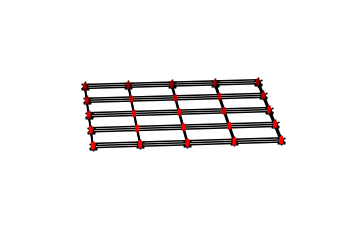

In [15]:
ax = Lattice_Plot(x, y, z, M1, [], 'XsY', 30, 85, 0.5, '10x10x2_fullbraced_uniform_3D')

In [ ]:
res = minimize(Energy, coord0, args = (f, M1), method='trust-constr', jac = Jacobian, options={'verbose': 1}, bounds=bounds)